<a href="https://colab.research.google.com/github/neelkanthrawat/mlph2023-Exercises/blob/main/sheet07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheet 7

In [107]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda import is_available as cuda_is_available

# 1) Log-sum-exp and softmax

(b)

In [105]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU.")


GPU: Tesla T4


In [106]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


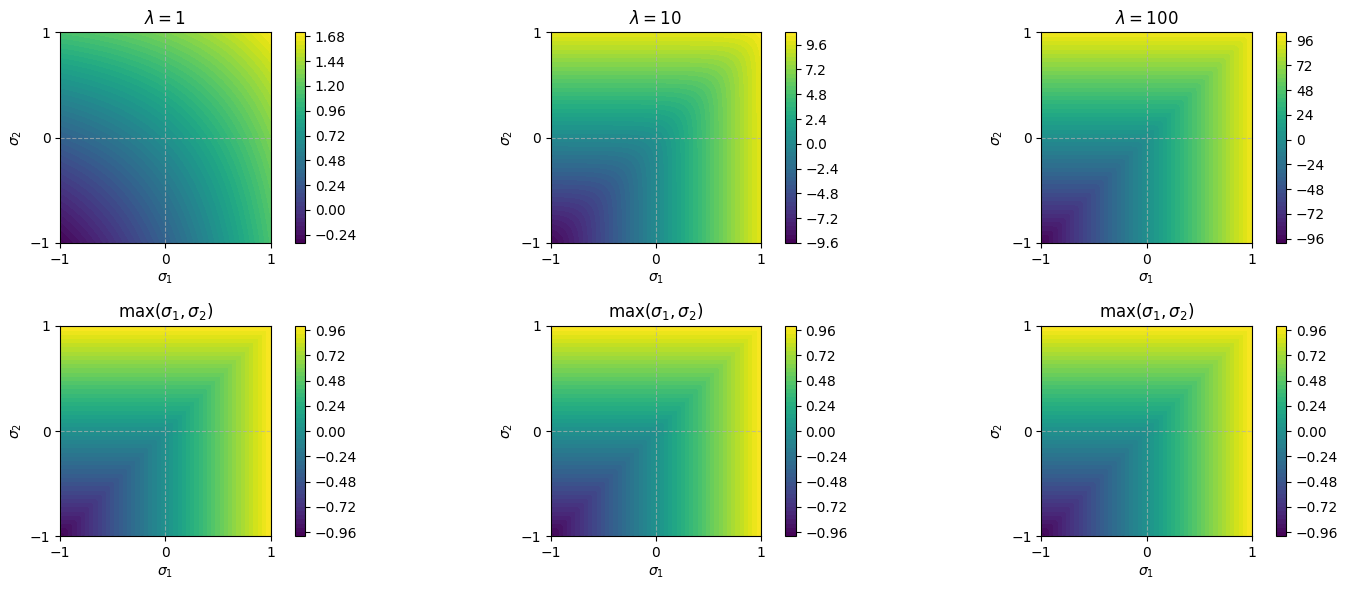

In [71]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def logsumexp(x, lamb=1):
    return torch.log(torch.sum(torch.exp(lamb * x)))

def set_up_axes(ax):
    ax.set_xlabel(r'$\sigma_1$')
    ax.set_ylabel(r'$\sigma_2$')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.grid(True, linestyle='--', alpha=0.7)

# Set up a grid of points in [-1, 1] x [-1, 1]
sigma_values = np.linspace(-1, 1, 100)
sigma1, sigma2 = np.meshgrid(sigma_values, sigma_values)

# Calculate the functions
lambda_values = [1, 10, 100]

fig, axs = plt.subplots(2, len(lambda_values), figsize=(15, 6))

for i, lamb in enumerate(lambda_values):
    lse_values = np.zeros_like(sigma1)
    max_values = np.maximum(sigma1, sigma2)

    for j in range(len(sigma_values)):
        for k in range(len(sigma_values)):
            lse_values[j, k] = logsumexp(torch.tensor([sigma1[j, k], sigma2[j, k]]), lamb).item()

    # Plot logsumexp
    c1 = axs[0, i].contourf(sigma1, sigma2, lse_values, levels=50, cmap='viridis')
    set_up_axes(axs[0, i])
    axs[0, i].set_title(r'$\lambda = {}$'.format(lamb))
    fig.colorbar(c1, ax=axs[0, i])

    # Plot max
    c2 = axs[1, i].contourf(sigma1, sigma2, max_values, levels=50, cmap='viridis')
    set_up_axes(axs[1, i])
    axs[1, i].set_title(r'$\max(\sigma_1, \sigma_2)$')
    fig.colorbar(c2, ax=axs[1, i])

plt.tight_layout()
plt.show()

(c)

In [72]:
# def softmax(x, axis, lamb=1):
#     # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
#     exp_values = torch.exp(lamb * x)
#     softmax_values = exp_values / exp_values.sum(dim=axis, keepdim=True)
#     return softmax_values


# # TODO: compute the argmax of each gridpoint in one-hot form
# onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# # TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# # plot the softmax
# fig, axs = plt.subplots(2, 4, figsize=(17, 7))

# # plot the onehot argmax


In [166]:
sigma_values = np.linspace(-1, 1, 5)
sigma1, sigma2 = np.meshgrid(sigma_values, sigma_values)
sigma1.size, sigma2.size

(25, 25)

In [168]:
sigma1, sigma2

(array([[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]]),
 array([[-1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. ,  1. ,  1. ]]))

In [169]:
torch.tensor(np.stack([sigma1, sigma2], axis=-1), dtype=torch.float32)

tensor([[[-1.0000, -1.0000],
         [-0.5000, -1.0000],
         [ 0.0000, -1.0000],
         [ 0.5000, -1.0000],
         [ 1.0000, -1.0000]],

        [[-1.0000, -0.5000],
         [-0.5000, -0.5000],
         [ 0.0000, -0.5000],
         [ 0.5000, -0.5000],
         [ 1.0000, -0.5000]],

        [[-1.0000,  0.0000],
         [-0.5000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.5000,  0.0000],
         [ 1.0000,  0.0000]],

        [[-1.0000,  0.5000],
         [-0.5000,  0.5000],
         [ 0.0000,  0.5000],
         [ 0.5000,  0.5000],
         [ 1.0000,  0.5000]],

        [[-1.0000,  1.0000],
         [-0.5000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.5000,  1.0000],
         [ 1.0000,  1.0000]]])

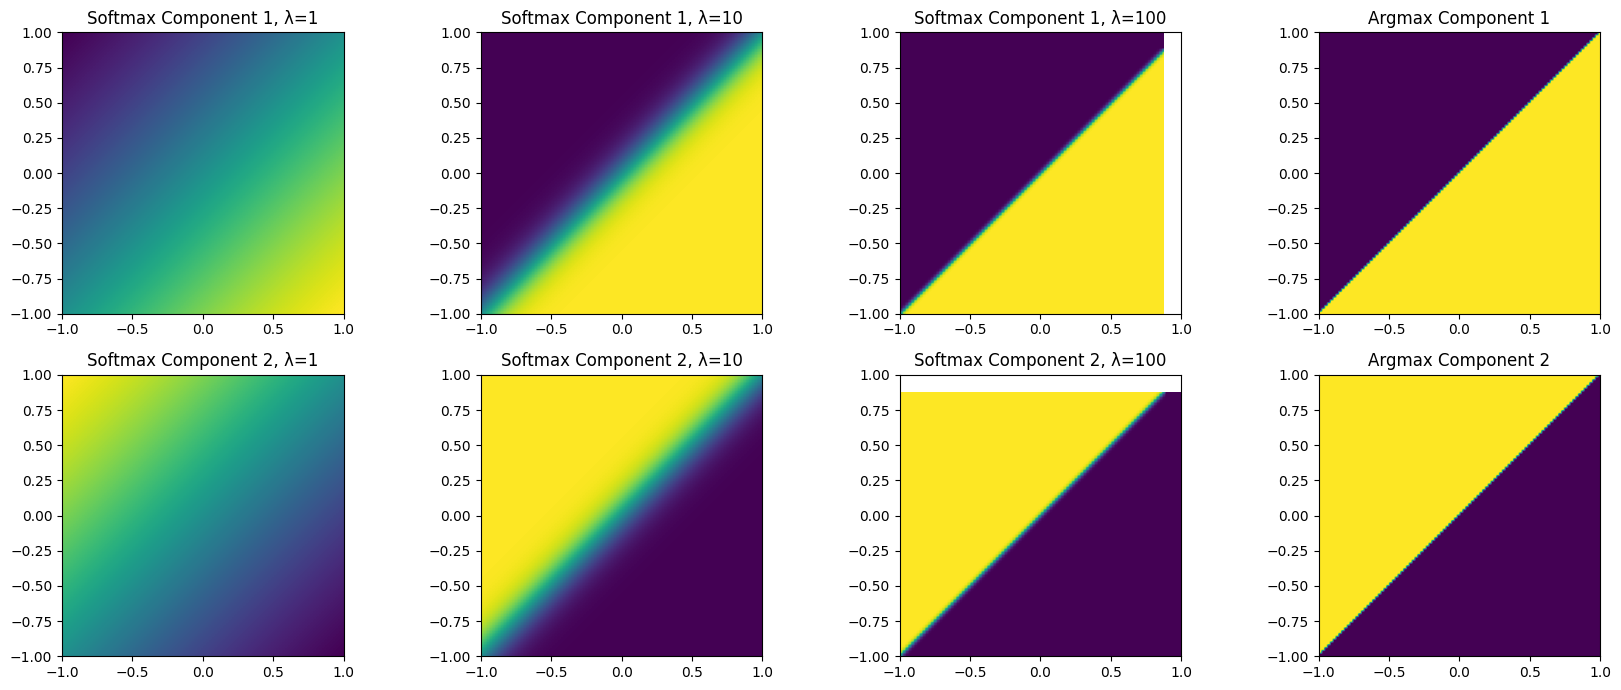

In [180]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def softmax(x, axis, lamb=1):
    exp_values = torch.exp(lamb * x)
    softmax_values = exp_values / torch.sum(exp_values, dim=axis, keepdim=True)
    return softmax_values

def to_onehot(indices):
    onehot = torch.zeros(indices.size() + (2,))
    onehot.scatter_(-1, indices.unsqueeze(-1), 1)
    return onehot

# Set up a grid of points in [-1, 1] x [-1, 1]
sigma_values = np.linspace(-1, 1, 100)
sigma1, sigma2 = np.meshgrid(sigma_values, sigma_values)
xy = torch.tensor(np.stack([sigma1, sigma2], axis=-1), dtype=torch.float32)

# Compute the softmax components
lambda_values = [1, 10, 100]
softmax_components = []

for lamb in lambda_values:
    softmax_values = softmax(xy, axis=-1, lamb=lamb)
    softmax_components.append(softmax_values)

# Compute the argmax of each gridpoint in one-hot form
onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# Plot the softmax components and argmax components
fig, axs = plt.subplots(2, 4, figsize=(17, 7))

for i, lamb in enumerate(lambda_values):
    axs[0, i].imshow(softmax_components[i][:, :, 0], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
    axs[0, i].set_title(f'Softmax Component 1, λ={lamb}')

    axs[1, i].imshow(softmax_components[i][:, :, 1], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
    axs[1, i].set_title(f'Softmax Component 2, λ={lamb}')

# Plot the argmax components
axs[0, -1].imshow(onehot_argmax[:, :, 0], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
axs[0, -1].set_title(f'Argmax Component 1')

axs[1, -1].imshow(onehot_argmax[:, :, 1], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
axs[1, -1].set_title(f'Argmax Component 2')

plt.tight_layout()
plt.show()


In [172]:
onehot_argmax.size()

torch.Size([100, 100, 2])

In [179]:
onehot_argmax[:,:,0], onehot_argmax[:,:,1]

(tensor([[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.]]))

In [177]:
onehot_argmax[:2,:2,:]

tensor([[[1., 0.],
         [1., 0.]],

        [[0., 1.],
         [1., 0.]]])

# 2) Top tagging with Point Clouds

See https://github.com/heidelberg-hepml/ml-tutorials for solutions

# 3) CNNs for Galaxy Classification

### This worked in my case

In [74]:
import requests

file_url = "http://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5"
output_path = "/content/Galaxy10_checking_sth.h5"  # Specify the local path where you want to save the file

response = requests.get(file_url)

with open(output_path, 'wb') as f:
    f.write(response.content)

print("File downloaded successfully.")


File downloaded successfully.


In [75]:
# !pip install astroNN


In [76]:
import h5py
# from astroNN.datasets import load_galaxy10sdss

In [77]:
# import os

# file_path = '/content/Galaxy10.h5'#'/content/Galaxy10.h5'
# file_size = os.path.getsize(file_path)
# print(f"File size: {file_size} bytes")


In [78]:
# import os

# file_path = '/content/Galaxy10.h5'
# print("File exists:", os.path.exists(file_path))


In [79]:
# !pip install --upgrade h5py

In [80]:

file_path = "/content/Galaxy10_checking_sth.h5"
with h5py.File(file_path, 'r') as f:
    print("Keys in the HDF5 file:", list(f.keys()))


Keys in the HDF5 file: ['ans', 'images']


In [81]:
import h5py
import numpy as np
import torch

label_names = [
    'Disk, Face-on, No Spiral',
    'Smooth, Completely round',
    'Smooth, in-between round',
    'Smooth, Cigar shaped',
    'Disk, Edge-on, Rounded Bulge',
    'Disk, Edge-on, Boxy Bulge',
    'Disk, Edge-on, No Bulge',
    'Disk, Face-on, Tight Spiral',
    'Disk, Face-on, Medium Spiral',
    'Disk, Face-on, Loose Spiral'
]
n_classes = len(label_names)

# To get the images and labels from file
path="/content/Galaxy10_checking_sth.h5"
with h5py.File(path, 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
images = images.astype(np.float32)

# comply to (batch, channel, height, width) convention of pytorch
images = np.moveaxis(images, -1, 1)
# convert to torch
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

print(f'images.shape={images.shape}, labels.shape={labels.shape}')

# print(labels.shape, images.shape)


images.shape=torch.Size([21785, 3, 69, 69]), labels.shape=torch.Size([21785])


In [82]:
print(images[0,:,:,:]); print(labels[0])

tensor([[[16., 18., 16.,  ...,  6.,  9.,  6.],
         [19., 23., 17.,  ...,  8., 10.,  6.],
         [17., 21., 17.,  ...,  8., 11.,  7.],
         ...,
         [17., 18., 15.,  ...,  2.,  3.,  5.],
         [22., 19., 12.,  ...,  4.,  6.,  7.],
         [30., 31., 24.,  ...,  8., 11., 12.]],

        [[18., 20., 17.,  ...,  6.,  9.,  6.],
         [24., 25., 18.,  ...,  5.,  8.,  6.],
         [22., 24., 18.,  ...,  4.,  8.,  6.],
         ...,
         [14., 17., 14.,  ...,  4.,  5.,  7.],
         [14., 14.,  9.,  ...,  7.,  9., 10.],
         [12., 14.,  9.,  ..., 11., 14., 15.]],

        [[15., 15., 12.,  ...,  4.,  7.,  4.],
         [20., 20., 13.,  ...,  3.,  6.,  4.],
         [18., 19., 13.,  ...,  3.,  7.,  4.],
         ...,
         [ 7.,  9.,  7.,  ...,  0.,  0.,  2.],
         [11.,  8.,  3.,  ...,  0.,  2.,  3.],
         [11.,  8.,  2.,  ...,  3.,  6.,  7.]]])
tensor(2, dtype=torch.uint8)


We will use the `numpy.unique` function which returns unique elements of an array and an array of indices that can be used to reconstruct the original array. This function is particularly useful for finding the unique elements in an array or counting the occurrences of unique elements.

In [83]:
## # TODO: print the number of samples for each class
labels_numpy = labels.numpy()
unique_classes, class_counts = np.unique(labels_numpy, return_counts=True)

for class_id, count in zip(unique_classes, class_counts):
    class_name = label_names[class_id]
    print(f"Class {class_id} ({class_name}): {count} samples")

Class 0 (Disk, Face-on, No Spiral): 3461 samples
Class 1 (Smooth, Completely round): 6997 samples
Class 2 (Smooth, in-between round): 6292 samples
Class 3 (Smooth, Cigar shaped): 349 samples
Class 4 (Disk, Edge-on, Rounded Bulge): 1534 samples
Class 5 (Disk, Edge-on, Boxy Bulge): 17 samples
Class 6 (Disk, Edge-on, No Bulge): 589 samples
Class 7 (Disk, Face-on, Tight Spiral): 1121 samples
Class 8 (Disk, Face-on, Medium Spiral): 906 samples
Class 9 (Disk, Face-on, Loose Spiral): 519 samples


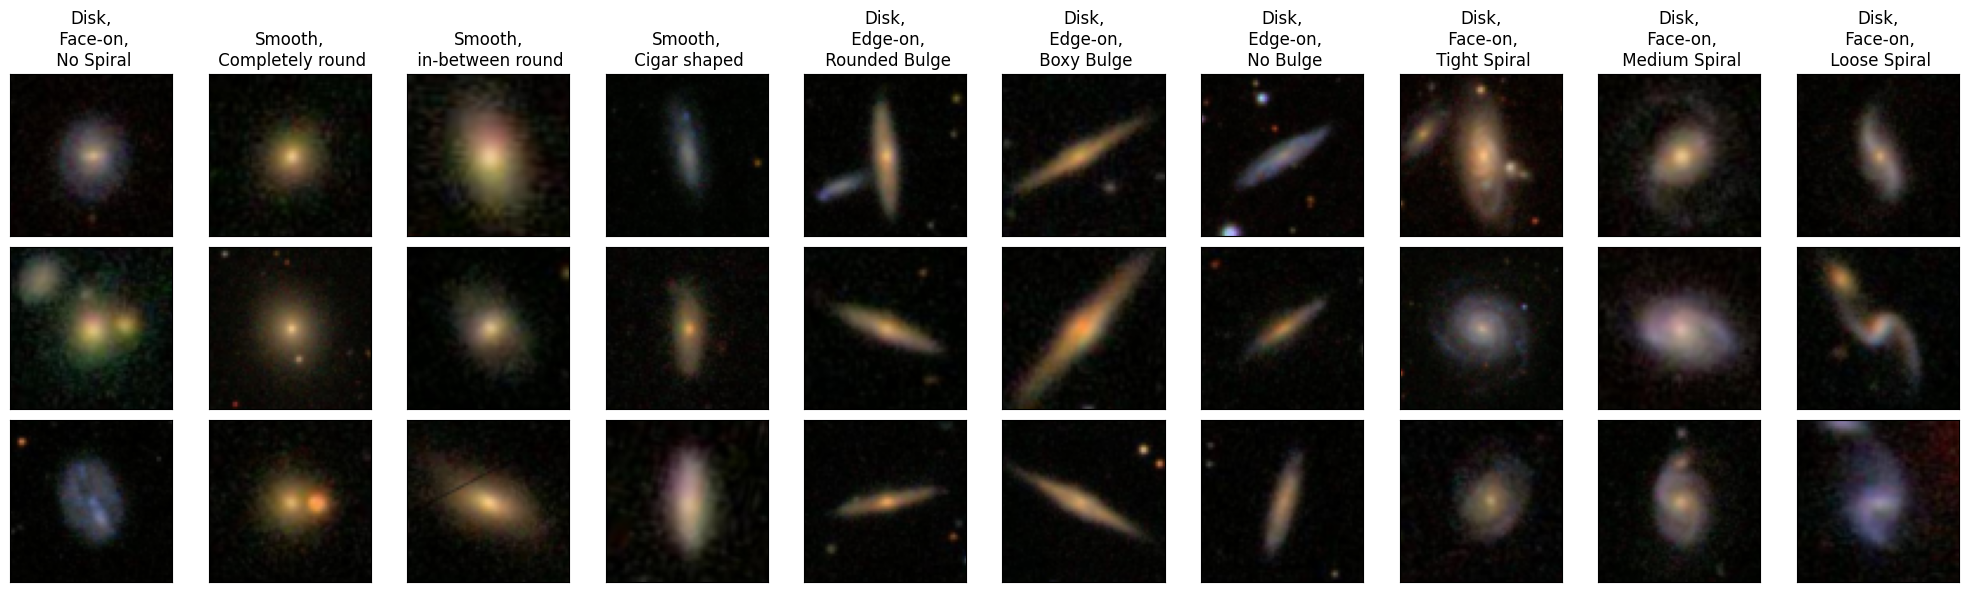

In [84]:
from matplotlib import pyplot as plt

# TODO: plot some samples of each class
itemindex = torch.where(labels == 3)
itemindex[:3]

samples_per_class = 3
fig, axss = plt.subplots(samples_per_class, n_classes, figsize=(n_classes * 2, samples_per_class * 2))
for label, (label_name, axs) in enumerate(zip(label_names, axss.T)):
    idx = torch.where(labels==label)[0][:samples_per_class] # take samples_per_class first occurences
    for i, (ind, ax) in enumerate(zip(idx, axs)):
        ax.imshow(images[ind].long().moveaxis(0, -1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title(label_name.replace(',',',\n'))
plt.tight_layout()
plt.show()

In [85]:
import torch

# recall that the 'images' is the PyTorch tensor with shape (num_samples, num_channels, height, width)
# Convert to float for accurate calculations
images_float = images.float()

# Compute the mean and standard deviation per channel
mean_per_channel = torch.mean(images_float, dim=(0, 2, 3))
std_per_channel = torch.std(images_float, dim=(0, 2, 3))

print("Mean per channel:", mean_per_channel)
print("Std per channel:", std_per_channel)

Mean per channel: tensor([27.7014, 23.8241, 18.1425])
Std per channel: tensor([37.5412, 31.3756, 26.3283])


In [86]:
from torchvision.transforms import Normalize

# TODO: Compute the mean and standard deviation per channel over the dataset

# stds = images.moveaxis(1, 0).reshape(3, -1).std(axis=1)
# means = images.moveaxis(1, 0).reshape(3, -1).mean(axis=1)
stds, means = torch.tensor([37.5412, 31.3756, 26.3283]), torch.tensor([27.7014, 23.8241, 18.1425])
print(stds, means)

# TODO: Normalize the images
normalize = Normalize(means, stds)
images_normalized = normalize(images)

tensor([37.5412, 31.3756, 26.3283]) tensor([27.7014, 23.8241, 18.1425])


* The normalize function subtracts the mean and divides by the standard deviation for each channel independently, ensuring that the normalized image has zero mean and unit variance for each channel.

In [87]:
### A code snippet to illustrate how normalise works?
# from torchvision.transforms import Normalize
# import torch

# # Example tensor representing an image with shape (C, H, W)
# image = torch.tensor([[[0.1, 0.2], [0.3, 0.4]], [[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])

# # Mean and standard deviation values for normalization
# mean = [0.5, 1.0, 3.0]
# std = [0.1, 0.2, 0.3]

# # Create the Normalize transform
# normalize = Normalize(mean, std)

# # Apply normalization to the image
# normalized_image = normalize(image)

# # Print the original and normalized images
# print("Original Image:")
# print(image)
# print("\nNormalized Image:")
# print(normalized_image)

In [88]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

n_samples = len(labels)

# TODO: split the data in training and validation sets, stratifying by the labels
train_idx, val_idx = train_test_split(np.arange(n_samples), test_size=0.1, stratify=labels)

# TODO: create pytorch datasets for training and validation
train_dataset = TensorDataset(images_normalized[train_idx].float(), labels[train_idx].long())
val_dataset = TensorDataset(images_normalized[val_idx].float(), labels[val_idx].long())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [89]:
import torch.nn as nn
import torch.nn.functional as F

#TODO: implement a small CNN as specified on the sheet


### Not needed these blocks of code:

In [90]:
### simpler one!!!


# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SmallCNN(nn.Module):
#     def __init__(self):
#         super(SmallCNN, self).__init__()

#         # Convolutional Blocks
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)

#         # Dynamically calculate input size for fully connected layers
#         self.fc_input_size = self.calculate_fc_input_size()

#         # Fully Connected Layers
#         self.fc1 = nn.Linear(self.fc_input_size, 64)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 10)

#     def forward(self, x):
#         # Convolutional Blocks
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))

#         # Dynamically calculate input size for fully connected layers
#         self.fc_input_size = x.view(x.size(0), -1).size(1)

#         # Flatten the tensor
#         x = x.view(-1, self.fc_input_size)

#         # Fully Connected Layers
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)

#         return x

#     def calculate_fc_input_size(self):
#         # Use a dummy tensor to calculate the size after the last convolutional layer
#         dummy_input = torch.zeros(1, 3, 69, 69)
#         dummy_output = self.conv1(dummy_input)
#         print(f"shape of the dummy output after the first conv layer:{dummy_output.size()}")
#         dummy_output = F.max_pool2d(dummy_output, 2)
#         print(f"shape of the dummy output after the first conv layer followed by maxpool 2d:{dummy_output.size()}")
#         dummy_output = self.conv2(dummy_output)
#         print(f"shape of the dummy output after the seond conv layer followed :{dummy_output.size()}")
#         dummy_output = F.max_pool2d(dummy_output, 2)
#         print(f"shape of the dummy output after the second conv layer followed by maxpool 2d:{dummy_output.size()}")


#         return dummy_output.view(dummy_output.size(0), -1).size(1)

# # Instantiate the model
# model = SmallCNN()

# # Print the model architecture
# print(model)


In [91]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SmallCNN(nn.Module):
#     def __init__(self):
#         super(SmallCNN, self).__init__()

#         # Convolutional Blocks
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)

#         # Dynamically calculate input size for fully connected layers
#         fc_input_size = self.calculate_fc_input_size()

#         # Fully Connected Layers
#         self.fc1 = nn.Linear(fc_input_size, 64)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 10)

#     def forward(self, x):
#         # Convolutional Blocks
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))

#         # Dynamically calculate input size for fully connected layers
#         fc_input_size = x.view(x.size(0), -1).size(1)

#         # flatten the tensor
#         x = x.view(-1, fc_input_size)

#         # Fully Connected Layers
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)

#         return x

#     def calculate_fc_input_size(self):
#         # Use a dummy tensor to calculate the size after the last convolutional layer
#         dummy_input = torch.zeros(1, 3, 69, 69)
#         dummy_output = self.conv1(dummy_input)
#         dummy_output = F.max_pool2d(dummy_output, 2)
#         dummy_output = self.conv2(dummy_output)
#         dummy_output = F.max_pool2d(dummy_output, 2)
#         return dummy_output.view(dummy_output.size(0), -1).size(1)

# # Instantiate the model
# model = SmallCNN()

# # Print the model architecture
# print(model)


In [92]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SmallCNN(nn.Module):
#     def __init__(self):
#         super(SmallCNN, self).__init__()

#         # Convolutional Blocks
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)

#         # Fully Connected Layers
#         self.fc1 = nn.Linear(16 * 14 * 14, 64)  # Adjusted based on the output size of the last convolution
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 10)  # Assuming 10 output classes for classification

#     def forward(self, x):
#         # Convolutional Blocks
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))## outputsize=inputsize/2
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))

#         # Flatten the tensor
#         x = x.view(-1, 16 * 14 * 14)  # Adjusted based on the output size of the last convolution

#         # Fully Connected Layers
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)

#         return x

# # Instantiate the model
# model = SmallCNN()

# # Print the model architecture
# print(model)


In [93]:
### THIS IS WRONG I BELIEVE!
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SmallCNN(nn.Module):
#     def __init__(self):
#         super(SmallCNN, self).__init__()

#         # Convolutional Blocks
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)

#         # Fully Connected Layers
#         self.fc1 = nn.Linear(1, 64)  # Placeholder, will be dynamically set in forward
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 10)

#     def forward(self, x):
#         # Convolutional Blocks
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))

#         # Dynamically calculate input size for fully connected layers
#         dynamic_input_size = x.view(x.size(0), -1).size(1)
#         self.fc1 = nn.Linear(dynamic_input_size, 64)#then a new fully connected layer (nn.Linear) is created with the correct input size.

#         # Flatten the tensor
#         x = x.view(-1, dynamic_input_size)

#         # Fully Connected Layers
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)

#         return x

# # Instantiate the model
# model = SmallCNN()

# # Print the model architecture
# print(model)

# # Example usage in the forward pass
# input_tensor = torch.randn(1, 3, 69, 69)  # Example input with size (batch_size, channels, height, width)

# output = model(input_tensor)
# print(output)


### Needed from here

In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super(SmallCNN, self).__init__()

        # Convolutional Blocks
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)

        # Fully Connected Layers
        self.fc1 = nn.Linear(16*14*14, 64)
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        # Convolutional Blocks
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))

        # Dynamically calculate input size for fully connected layers
        self.fc_input_size = x.view(x.size(0), -1).size(1)

        # Flatten the tensor
        x = x.view(-1, self.fc_input_size)

        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


       # return dummy_output.view(dummy_output.size(0), -1).size(1)

In [95]:
# Instantiate the model
model = SmallCNN()

# Print the model architecture
print(model)

SmallCNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


(b)

In [96]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion

# TODO: implement the training loop, validating after every epoch, and make the requested plots
from sklearn.metrics import confusion_matrix


In [97]:
# import torch
# import torch.nn as nn
# from sklearn.metrics import confusion_matrix
# from tqdm import tqdm

# def train_and_evaluate_model(model, train_loader, val_loader, num_epochs, optimizer, print_after=10):
#     criterion = nn.CrossEntropyLoss()
#     train_losses = []
#     val_losses = []

#     for epoch in tqdm(range(num_epochs), desc="Epochs"):
#         # Training
#         model.train()
#         running_train_loss = 0.0

#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             train_loss = criterion(outputs, labels)
#             train_loss.backward()
#             optimizer.step()

#             running_train_loss += train_loss.item()

#         average_train_loss = running_train_loss / len(train_loader)
#         #print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {average_train_loss:.4f}')
#         train_losses.append(average_train_loss)

#         # Validation
#         model.eval()
#         running_val_loss = 0.0
#         correct = 0
#         total = 0
#         all_preds = []
#         all_labels = []

#         with torch.no_grad():
#             for val_inputs, val_labels in val_loader:
#                 val_outputs = model(val_inputs)
#                 val_loss = criterion(val_outputs, val_labels)

#                 _, val_preds = torch.max(val_outputs, 1)
#                 correct += (val_preds == val_labels).sum().item()
#                 total += val_labels.size(0)
#                 all_preds.extend(val_preds.tolist())
#                 all_labels.extend(val_labels.tolist())

#                 running_val_loss += val_loss.item()

#             average_val_loss = running_val_loss / len(val_loader)
#             val_losses.append(average_val_loss)

#             if (epoch + 1) % print_after == 0:
#                 print(f"\n Epoch {epoch + 1}/{num_epochs}, training loss: {average_train_loss} and  Validation Loss: {average_val_loss:.4f}")

#     accuracy = correct / total
#     confusion_mat = confusion_matrix(all_labels, all_preds)

#     return train_losses, accuracy, confusion_mat, val_losses


In [98]:
# Understanding how torch.max works
# import torch

# # Assume outputs is a tensor representing raw scores/logits
# outputs = torch.randn(3, 5)  # 3 examples, 5 classes

# # Find the maximum values and indices along dimension 1
# max_values, max_indices = torch.max(outputs, dim=1)

# print("Maximum values:", max_values)
# print("Indices of maximum values:", max_indices)


In [109]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

def train_and_evaluate_model(model, train_loader, val_loader, num_epochs, optimizer, print_after=10):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracies = []  # Store training accuracies for each epoch
    val_accuracies = []  # Store validation accuracies for each epoch

    for epoch in tqdm(range(num_epochs), desc="Epochs"):
        # Training
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            train_loss = criterion(outputs, labels)
            train_loss.backward()
            optimizer.step()

            running_train_loss += train_loss.item()

            _, predicted_train = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

        average_train_loss = running_train_loss / len(train_loader)
        train_losses.append(average_train_loss)

        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels= val_inputs.to(device), val_labels.to(device)  # Move to GPU
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                correct_val += (val_preds == val_labels).sum().item()
                total_val += val_labels.size(0)
                all_preds.extend(val_preds.tolist())
                all_labels.extend(val_labels.tolist())

                running_val_loss += val_loss.item()

            average_val_loss = running_val_loss / len(val_loader)
            val_losses.append(average_val_loss)

            val_accuracy = correct_val / total_val
            val_accuracies.append(val_accuracy)

            if (epoch + 1) % print_after == 0:
                print(f"\n Epoch {epoch + 1}/{num_epochs}, training loss: {average_train_loss:.4f}, training accuracy: {train_accuracy:.4f}, Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    confusion_mat = confusion_matrix(all_labels, all_preds)

    return train_losses, train_accuracies, confusion_mat, val_losses, val_accuracies


In [160]:
# Function to plot training and validation losses
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_losses) + 1)

    plt.plot(train_losses,"o-" ,label='Training Loss')
    plt.plot(val_losses, "o-",label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    #plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    #plt.show()

In [117]:
# Instantiate the model
model = SmallCNN(dropout_prob=0.1)

# Move the model to the GPU if available
device = torch.device("cuda" if cuda_is_available() else "cpu")
model.to(device)

# Print the model architecture
print(model)

# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, train_accuracy, confusion_mat, val_losses, val_accuracies=train_and_evaluate_model(model,
                                                                           train_loader, val_loader,
                                                                           num_epochs=20, optimizer=optimizer,
                                                                           print_after=2)

SmallCNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


Epochs:  10%|█         | 2/20 [00:11<01:38,  5.47s/it]


 Epoch 2/20, training loss: 0.9440, training accuracy: 0.6401, Validation Loss: 0.8829, Validation Accuracy: 0.6723


Epochs:  20%|██        | 4/20 [00:20<01:15,  4.74s/it]


 Epoch 4/20, training loss: 0.7421, training accuracy: 0.7226, Validation Loss: 0.8021, Validation Accuracy: 0.7141


Epochs:  30%|███       | 6/20 [00:28<01:00,  4.34s/it]


 Epoch 6/20, training loss: 0.6260, training accuracy: 0.7670, Validation Loss: 0.7078, Validation Accuracy: 0.7577


Epochs:  40%|████      | 8/20 [00:36<00:51,  4.29s/it]


 Epoch 8/20, training loss: 0.5441, training accuracy: 0.7957, Validation Loss: 0.7022, Validation Accuracy: 0.7494


Epochs:  50%|█████     | 10/20 [00:45<00:43,  4.34s/it]


 Epoch 10/20, training loss: 0.4758, training accuracy: 0.8212, Validation Loss: 0.7455, Validation Accuracy: 0.7627


Epochs:  60%|██████    | 12/20 [00:53<00:33,  4.21s/it]


 Epoch 12/20, training loss: 0.4157, training accuracy: 0.8455, Validation Loss: 0.8196, Validation Accuracy: 0.7655


Epochs:  70%|███████   | 14/20 [01:02<00:25,  4.24s/it]


 Epoch 14/20, training loss: 0.3685, training accuracy: 0.8626, Validation Loss: 0.9760, Validation Accuracy: 0.7246


Epochs:  80%|████████  | 16/20 [01:10<00:17,  4.30s/it]


 Epoch 16/20, training loss: 0.3168, training accuracy: 0.8794, Validation Loss: 1.0801, Validation Accuracy: 0.7191


Epochs:  90%|█████████ | 18/20 [01:18<00:08,  4.15s/it]


 Epoch 18/20, training loss: 0.2769, training accuracy: 0.8969, Validation Loss: 1.1239, Validation Accuracy: 0.7292


Epochs: 100%|██████████| 20/20 [01:27<00:00,  4.38s/it]


 Epoch 20/20, training loss: 0.2390, training accuracy: 0.9106, Validation Loss: 1.2946, Validation Accuracy: 0.7237


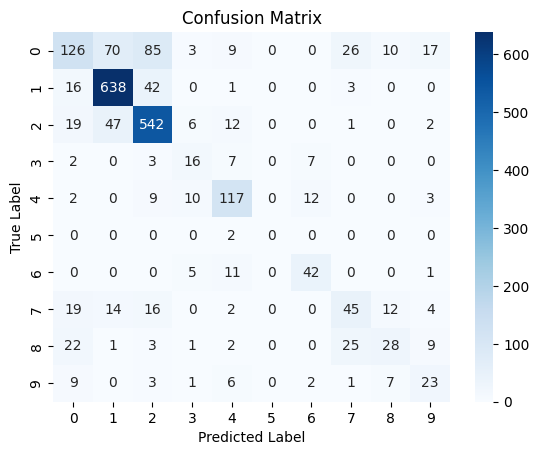

In [120]:
# Print and plot results
# print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
# print(f'Validation Accuracy: {val_accuracies * 100:.2f}%')
plot_confusion_matrix(confusion_mat)

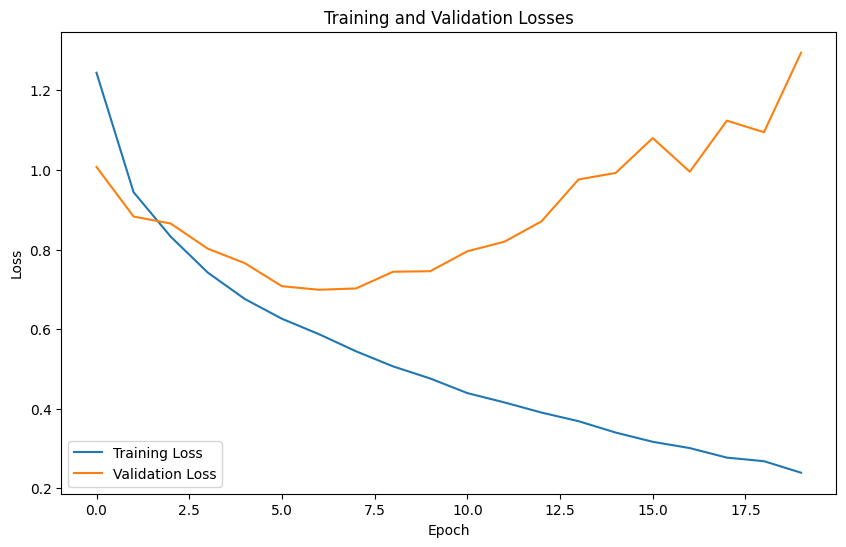

In [121]:
# Plot training and validation losses
plot_losses(train_losses, val_losses)

(c)

### Resnet network!

In [69]:
# TODO: redo (c) with a ResNet
# Hint: Training is probably quicker on google colab (https://colab.research.google.com/)



In [126]:
import torch
import torch.nn as nn
import torchvision.models as models

# Step 1: Load Pre-trained ResNet34 Model
resnet34_model = models.resnet34(pretrained=True)
# Move the model to the GPU if available
device = torch.device("cuda" if cuda_is_available() else "cpu")
resnet34_model.to(device)

# Step 2: Modify the Final Fully Connected Layer
num_classes = 10  # Replace with the actual number of classes in your task
resnet34_model.fc = nn.Linear(resnet34_model.fc.in_features, num_classes)
resnet34_model = resnet34_model.to(device)

# Step 3: Training and Evaluation (using the train_and_evaluate_model function)
num_epochs = 10
learning_rate = 0.001
optimizer = torch.optim.Adam(resnet34_model.parameters(), lr=learning_rate)

train_losses_resnet, train_accuracy_resnet, confusion_mat_resnet, val_losses_resnet, val_accuracy_resnet=train_and_evaluate_model(resnet34_model,
                                                                           train_loader, val_loader,
                                                                           num_epochs=10, optimizer=optimizer,
                                                                           print_after=1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epochs:  10%|█         | 1/10 [00:39<05:51, 39.06s/it]


 Epoch 1/10, training loss: 1.0430, training accuracy: 0.6072, Validation Loss: 1.3028, Validation Accuracy: 0.5672


Epochs:  20%|██        | 2/10 [01:17<05:10, 38.86s/it]


 Epoch 2/10, training loss: 0.7310, training accuracy: 0.7331, Validation Loss: 0.6065, Validation Accuracy: 0.7921


Epochs:  30%|███       | 3/10 [01:57<04:33, 39.13s/it]


 Epoch 3/10, training loss: 0.6143, training accuracy: 0.7789, Validation Loss: 0.5637, Validation Accuracy: 0.8008


Epochs:  40%|████      | 4/10 [02:36<03:54, 39.04s/it]


 Epoch 4/10, training loss: 0.5565, training accuracy: 0.7956, Validation Loss: 0.5505, Validation Accuracy: 0.8063


Epochs:  50%|█████     | 5/10 [03:15<03:15, 39.03s/it]


 Epoch 5/10, training loss: 0.5111, training accuracy: 0.8151, Validation Loss: 0.5963, Validation Accuracy: 0.7912


Epochs:  60%|██████    | 6/10 [03:53<02:35, 38.96s/it]


 Epoch 6/10, training loss: 0.4430, training accuracy: 0.8382, Validation Loss: 0.6149, Validation Accuracy: 0.8082


Epochs:  70%|███████   | 7/10 [04:32<01:56, 38.89s/it]


 Epoch 7/10, training loss: 0.3787, training accuracy: 0.8643, Validation Loss: 0.5818, Validation Accuracy: 0.7985


Epochs:  80%|████████  | 8/10 [05:11<01:17, 38.85s/it]


 Epoch 8/10, training loss: 0.3157, training accuracy: 0.8857, Validation Loss: 0.5351, Validation Accuracy: 0.8210


Epochs:  90%|█████████ | 9/10 [05:50<00:38, 38.84s/it]


 Epoch 9/10, training loss: 0.2711, training accuracy: 0.9044, Validation Loss: 0.6015, Validation Accuracy: 0.8054


Epochs: 100%|██████████| 10/10 [06:28<00:00, 38.90s/it]


 Epoch 10/10, training loss: 0.2149, training accuracy: 0.9236, Validation Loss: 0.5431, Validation Accuracy: 0.8330


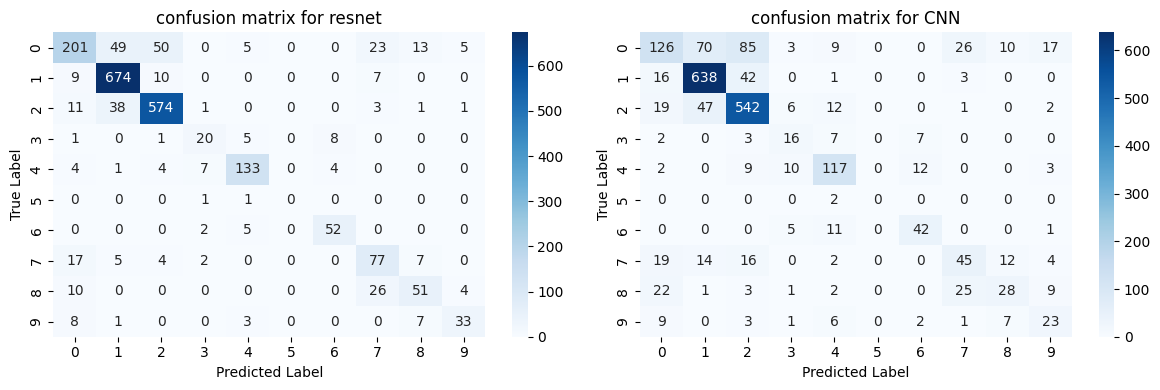

In [141]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_confusion_matrix(confusion_mat_resnet)
plt.title("confusion matrix for resnet")
plt.subplot(1,2,2)
plot_confusion_matrix(confusion_mat)
plt.title("confusion matrix for CNN")
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

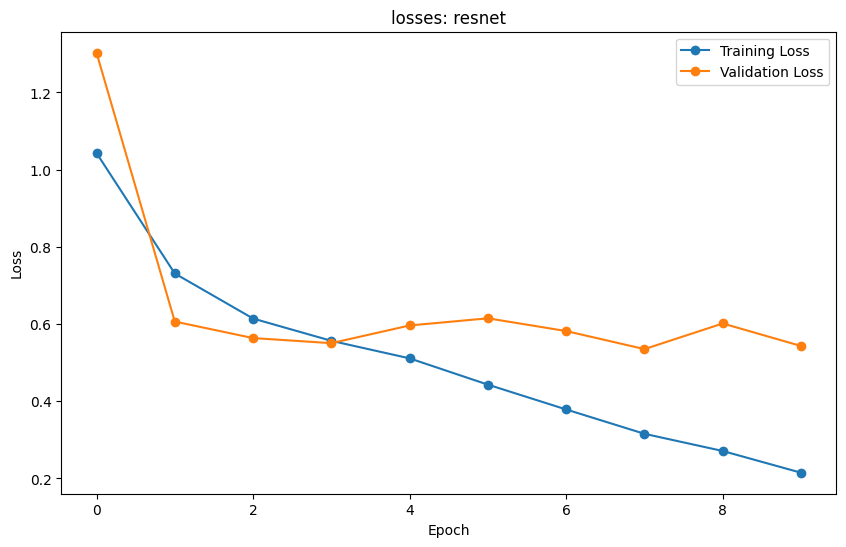

<Figure size 1200x400 with 0 Axes>

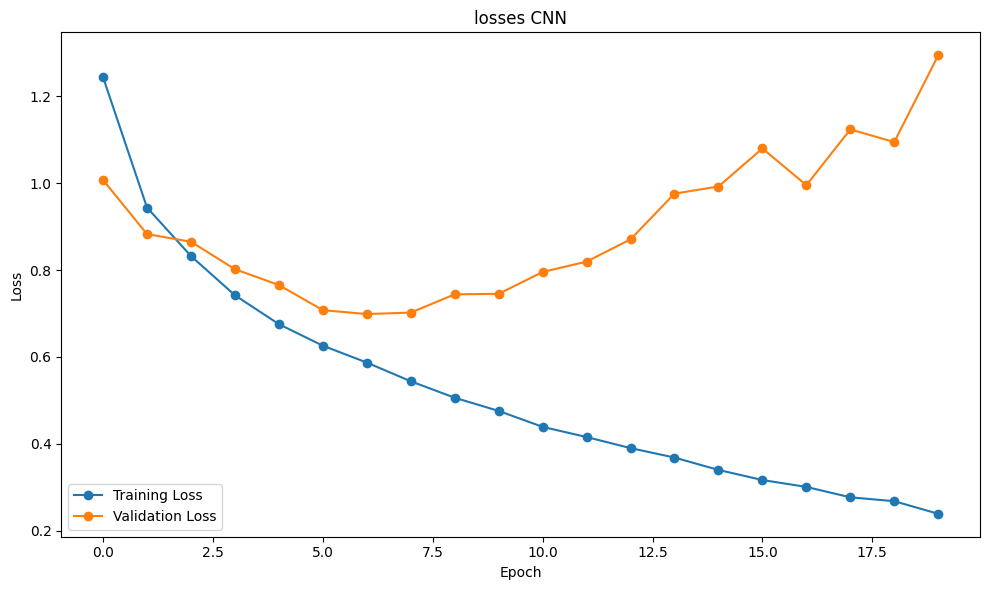

In [161]:
# Plot training and validation losses
plt.figure(figsize=(12,4))
plot_losses(train_losses_resnet, val_losses_resnet)
plt.title("losses: resnet")
plt.legend()
plt.figure(figsize=(12,4))
plot_losses(train_losses, val_losses)
plt.title("losses CNN")
plt.legend()
plt.tight_layout()